In [19]:
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from src.EuroSat_dataloaders import Test_Dataset_EuroSat,transformation_eurosat
from torchvision.datasets import EuroSAT
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torchvision.transforms import v2
from src.faithfulness.perturbation import eurosat_perturbation, thr_fc, thr_fc_bin,eurosat_perturbation_inverted
from src.faithfulness.silency_map import Silency_map_gen

## VGG-16

In [20]:

# model

vgg = torch.load("finished\\VGG16\\vgg_model.pth")
vgg.cuda()
for param in vgg.features.parameters():
        param.requires_grad = True
# add softmax
fc_ = list(vgg.classifier)
fc_.append(torch.nn.Softmax(dim=1))
vgg.classifier = torch.nn.Sequential(*fc_)
vgg.eval()

# dataset:

transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Resize(224,antialias=None),
])
ds = EuroSAT("../EuroSat",transform=transforms,target_transform=transformation_eurosat,download=False)
ds_test = Test_Dataset_EuroSat(ds)

# target layer:
nr = 25
cam_type = "grad_cam_plus_plus"


vgg_plus = torch.load("finished\\VGG16\\vgg_model.pth")
vgg_plus.cuda()
for param in vgg_plus.features.parameters():
        param.requires_grad = True


target_layers = [vgg_plus.features[-2]]
targets = None

sil_gen = Silency_map_gen(vgg_plus, ds_test, target_layers)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [35]:
DS_LABELS = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway","Industrial","Pasture","PermanentCrop",
             "Residential", "River", "SeaLake"]

In [36]:
df_pred = pd.read_csv("finished\VGG16\\pred_test.csv")
ds_test = Test_Dataset_EuroSat(ds)
true_val = []
pred_val = []
for i in range(len(ds_test)):
    true_val.append(ds_test[i][1].argmax().item())
    pred_val.append(df_pred.iloc[i].argmax())

In [37]:
false_lst = []
for i in range(len(pred_val)):
    if true_val[i] != pred_val[i]:
        false_lst.append((true_val[i],pred_val[i],i))
print(false_lst)
print(len(false_lst))

[(8, 1, 34), (5, 0, 35), (3, 8, 36), (9, 6, 58), (1, 5, 69), (5, 2, 109), (6, 2, 110), (8, 3, 125), (8, 6, 129), (8, 3, 139), (3, 6, 182), (7, 2, 203), (1, 8, 230), (3, 6, 235), (3, 2, 247), (6, 2, 248), (2, 5, 255), (3, 8, 289), (5, 8, 292), (0, 8, 335), (0, 6, 402), (6, 4, 403), (8, 3, 420), (5, 9, 449), (0, 6, 457), (9, 8, 466), (3, 6, 485), (3, 6, 492), (6, 4, 514), (3, 8, 541), (6, 4, 577), (0, 9, 588), (6, 2, 599), (6, 3, 606), (0, 2, 620), (6, 0, 633), (8, 9, 636), (6, 0, 672), (4, 3, 691), (2, 1, 713), (0, 6, 736), (3, 8, 747), (3, 6, 769), (2, 6, 776), (5, 0, 821), (0, 8, 836), (8, 3, 847), (8, 3, 879), (1, 5, 888), (0, 6, 900), (3, 4, 928), (5, 0, 934), (6, 4, 936), (5, 3, 966), (5, 9, 986), (8, 0, 988), (3, 4, 993), (3, 8, 1006), (9, 6, 1012), (6, 4, 1058), (5, 8, 1072), (0, 2, 1074), (1, 9, 1078), (5, 1, 1109), (4, 7, 1129), (2, 6, 1146), (3, 2, 1150), (8, 3, 1160), (5, 6, 1181), (3, 6, 1194), (6, 7, 1230), (8, 3, 1235), (5, 8, 1236), (8, 3, 1244), (5, 2, 1268), (3, 8, 1276

In [39]:
lst_false = [(8, 1, 34), (5, 0, 35), (3, 8, 36), (9, 6, 58), (1, 5, 69), (5, 2, 109), (6, 2, 110), (8, 3, 125), (8, 6, 129), (8, 3, 139), (3, 6, 182), (7, 2, 203), (1, 8, 230), (3, 6, 235), (3, 2, 247), (6, 2, 248), (2, 5, 255), (3, 8, 289), (5, 8, 292), (0, 8, 335), (0, 6, 402), (6, 4, 403), (8, 3, 420), (5, 9, 449), (0, 6, 457), (9, 8, 466), (3, 6, 485), (3, 6, 492), (6, 4, 514), (3, 8, 541), (6, 4, 577), (0, 9, 588), (6, 2, 599), (6, 3, 606), (0, 2, 620), (6, 0, 633), (8, 9, 636), (6, 0, 672), (4, 3, 691), (2, 1, 713), (0, 6, 736), (3, 8, 747), (3, 6, 769), (2, 6, 776), (5, 0, 821), (0, 8, 836), (8, 3, 847), (8, 3, 879), (1, 5, 888), (0, 6, 900), (3, 4, 928), (5, 0, 934), (6, 4, 936), (5, 3, 966), (5, 9, 986), (8, 0, 988), (3, 4, 993), (3, 8, 1006), (9, 6, 1012), (6, 4, 1058), (5, 8, 1072), (0, 2, 1074), (1, 9, 1078), (5, 1, 1109), (4, 7, 1129), (2, 6, 1146), (3, 2, 1150), (8, 3, 1160), (5, 6, 1181), (3, 6, 1194), (6, 7, 1230), (8, 3, 1235), (5, 8, 1236), (8, 3, 1244), (5, 2, 1268), (3, 8, 1276), (5, 2, 1292), (5, 9, 1293), (2, 7, 1299), (5, 6, 1306), (7, 4, 1307), (5, 0, 1309), (4, 7, 1320), (3, 4, 1329), (3, 8, 1333), (3, 0, 1363), (3, 2, 1386), (6, 2, 1397), (0, 6, 1465), (3, 8, 1468), (0, 6, 1477), (5, 1, 1534), (3, 8, 1550), (3, 8, 1567), (5, 0, 1585), (6, 4, 1606), (5, 8, 1633), (3, 8, 1656), (1, 8, 1660), (2, 7, 1674), (5, 6, 1681), (3, 8, 1683), (2, 5, 1689), (5, 0, 1692), (5, 1, 1693), (0, 6, 1714), (3, 0, 1741), (5, 2, 1748), (3, 8, 1754), (0, 8, 1755), (6, 4, 1766), (5, 1, 1777), (5, 8, 1794), (8, 2, 1798), (4, 7, 1811), (3, 0, 1841), (3, 9, 1853), (8, 5, 1868), (0, 4, 1877), (5, 8, 1918), (1, 2, 1942), (3, 6, 1984), (8, 5, 1987), (8, 3, 2007), (8, 3, 2039), (4, 7, 2052), (3, 8, 2087), (8, 9, 2104), (8, 0, 2105), (5, 0, 2110), (0, 6, 2134), (6, 2, 2150), (5, 4, 2163), (8, 3, 2176), (2, 6, 2183), (1, 2, 2184), (8, 3, 2193), (6, 2, 2198), (6, 3, 2199), (6, 0, 2212), (0, 9, 2239), (6, 0, 2281), (6, 3, 2285), (5, 7, 2286), (2, 6, 2321), (3, 6, 2330), (3, 0, 2333), (2, 6, 2340), (5, 8, 2357), (3, 6, 2368), (5, 2, 2381), (0, 8, 2382), (6, 4, 2396), (5, 1, 2420), (5, 1, 2430), (3, 7, 2445), (3, 0, 2452), (3, 8, 2506), (4, 7, 2573), (0, 5, 2603), (3, 6, 2619), (0, 9, 2649), (0, 9, 2654), (0, 6, 2656), (6, 2, 2691), (6, 3, 2694), (8, 3, 2697)]

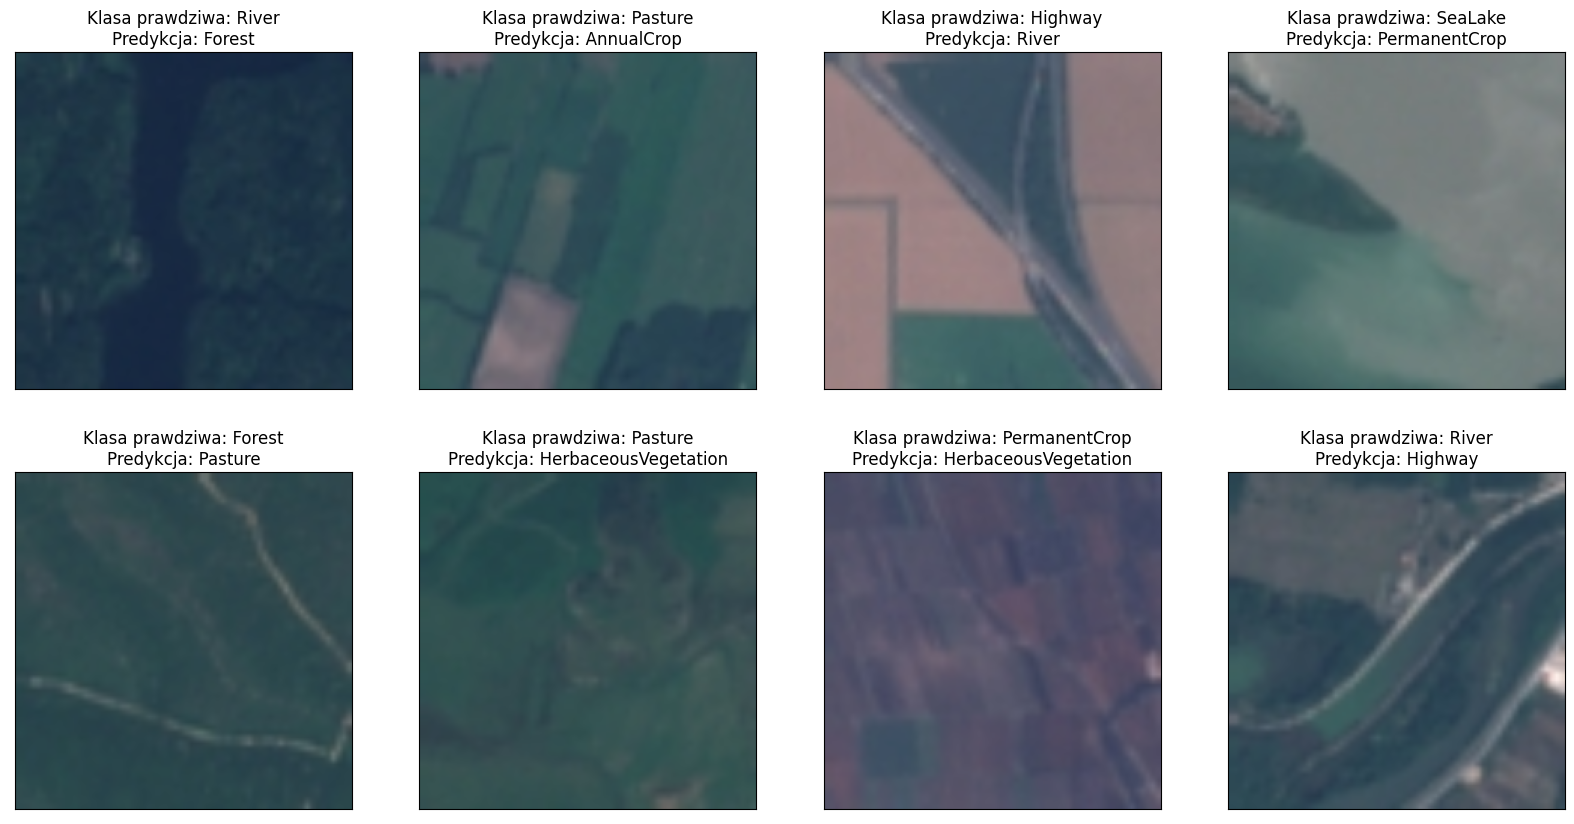

In [40]:
baseline_im = torch.zeros(sil_gen.ds[0][0].shape)
baseline_sl = sil_gen.get_silency_map_input(baseline_im,cam_type=cam_type)
cam_image = show_cam_on_image(torch.transpose(baseline_im.T,1,0).numpy(), baseline_sl, use_rgb=True)
fig, ax = plt.subplots(2,4)
fig.set_size_inches(20,10)

for i,j,temp in zip([0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3],lst_false):
    ax[i,j].imshow(torch.transpose((sil_gen.ds[temp[2]][0].T.cpu()+1)/2,1,0).numpy())
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    ax[i,j].set_title(f"Klasa prawdziwa: {DS_LABELS[temp[0]]}\nPredykcja: {DS_LABELS[temp[1]]}")

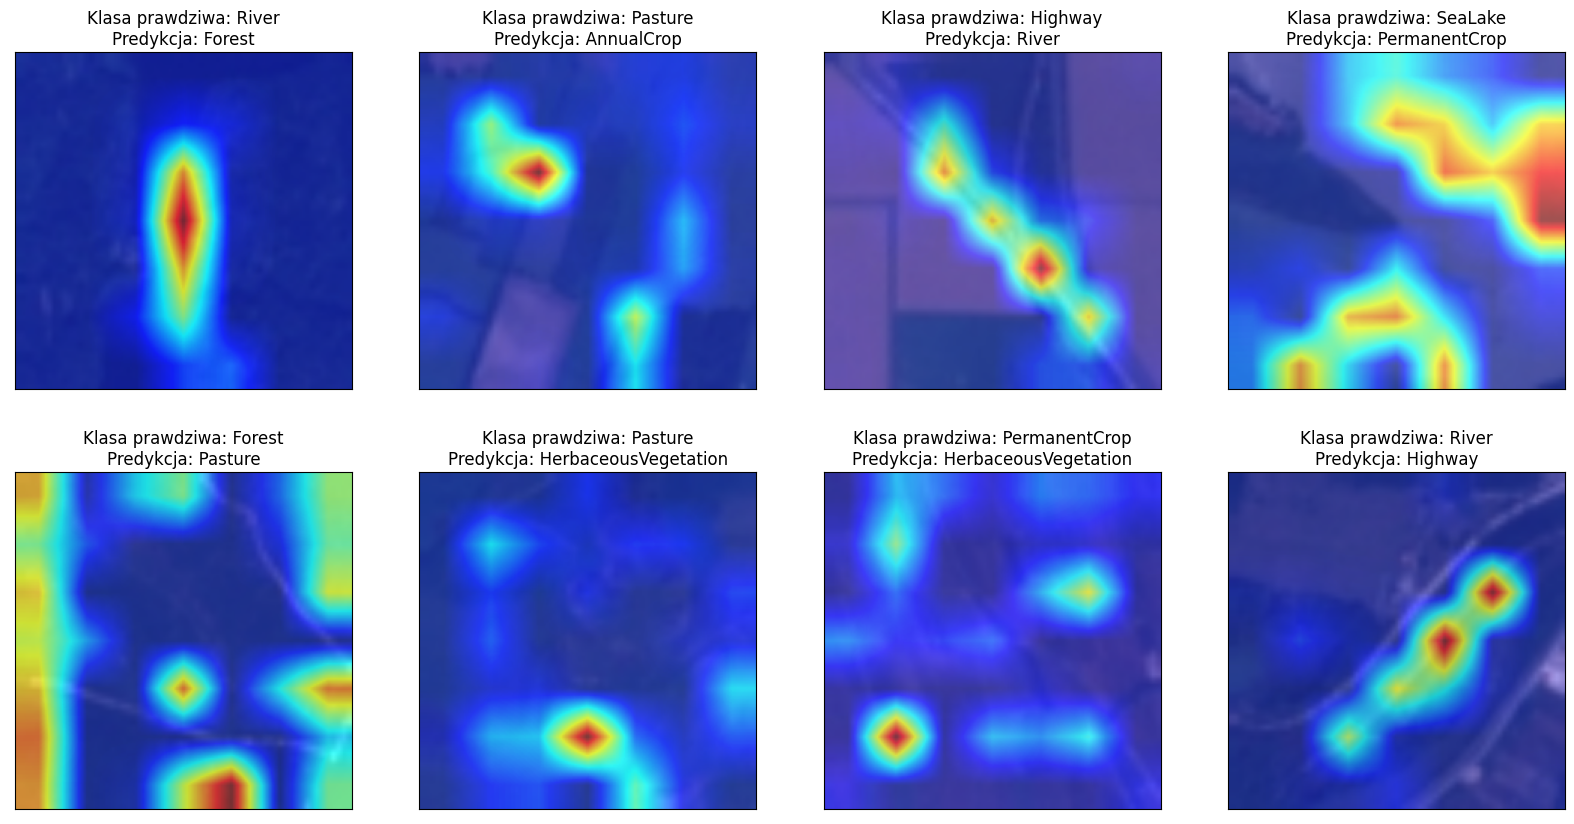

In [41]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(20,10)

for i,j,temp in zip([0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3],lst_false):
    sl , pert_sl, pred = sil_gen.get_pair_sailency(temp[2],return_pred = True)
    cam_image = show_cam_on_image(torch.transpose((sil_gen.ds[temp[2]][0].T.cpu()+1)/2,1,0).numpy(), sl, use_rgb=True)
    ax[i,j].imshow(cam_image)
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    ax[i,j].set_title(f"Klasa prawdziwa: {DS_LABELS[temp[0]]}\nPredykcja: {DS_LABELS[temp[1]]}")

## ResNet50

In [28]:

resnet50 = torch.load("finished\\ResNet50_new\\resnet50_model.pth")
resnet50.cuda()

# add softmax

fc_ = list(resnet50.fc)
fc_.append(torch.nn.Softmax(dim=1))
resnet50.fc = torch.nn.Sequential(*fc_)
resnet50.eval()

resnet50_plus = torch.load("finished\\ResNet50_new\\resnet50_model.pth")
resnet50_plus.cuda()
resnet50_plus.eval()

# dataset:
transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Resize(224,antialias=None),
])
ds = EuroSAT("../EuroSat",transform=transforms,target_transform=transformation_eurosat,download=False)
ds_test = Test_Dataset_EuroSat(ds)

# target layer:
cam_type = "grad_cam_plus_plus"
target_layers = [resnet50_plus.layer4[-1]]
sil_gen = Silency_map_gen(resnet50_plus, ds_test, target_layers)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [29]:
DS_LABELS = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway","Industrial","Pasture","PermanentCrop",
             "Residential", "River", "SeaLake"]

In [30]:
df_pred = pd.read_csv("finished\ResNet50_new\\pred_test.csv")
ds_test = Test_Dataset_EuroSat(ds)
true_val = []
pred_val = []
for i in range(len(ds_test)):
    true_val.append(ds_test[i][1].argmax().item())
    pred_val.append(df_pred.iloc[i].argmax())

In [31]:
false_lst = []
for i in range(len(pred_val)):
    if true_val[i] != pred_val[i]:
        false_lst.append((true_val[i],pred_val[i],i))
print(false_lst)
print(len(false_lst))

[(3, 7, 5), (0, 9, 8), (0, 6, 183), (0, 6, 331), (9, 8, 466), (1, 2, 490), (6, 2, 524), (0, 2, 620), (6, 5, 633), (8, 9, 636), (6, 0, 672), (0, 6, 736), (8, 3, 761), (2, 6, 776), (6, 2, 778), (8, 2, 792), (5, 2, 860), (2, 4, 881), (0, 6, 900), (6, 0, 902), (5, 6, 934), (2, 9, 1015), (6, 2, 1023), (5, 1, 1109), (3, 4, 1159), (8, 0, 1160), (2, 6, 1190), (6, 2, 1230), (5, 8, 1236), (5, 2, 1268), (6, 0, 1284), (5, 9, 1293), (5, 2, 1303), (6, 3, 1305), (0, 6, 1332), (2, 6, 1366), (7, 4, 1509), (6, 0, 1526), (6, 2, 1565), (5, 0, 1585), (0, 6, 1634), (5, 0, 1692), (5, 1, 1693), (5, 0, 1748), (6, 2, 1781), (2, 6, 1825), (0, 6, 1843), (0, 6, 1877), (5, 1, 1920), (5, 8, 1925), (2, 6, 1974), (2, 0, 2095), (1, 2, 2118), (0, 6, 2134), (4, 6, 2140), (2, 6, 2190), (0, 5, 2239), (6, 0, 2281), (0, 9, 2301), (8, 3, 2311), (2, 6, 2321), (3, 0, 2333), (6, 2, 2339), (2, 6, 2340), (5, 1, 2381), (6, 3, 2396), (5, 1, 2420), (2, 5, 2431), (3, 2, 2532), (4, 7, 2541), (0, 6, 2545), (0, 5, 2569), (0, 5, 2626), (6

In [32]:
lst_false = [(3, 7, 5), (0, 9, 8), (0, 6, 183), (0, 6, 331), (9, 8, 466), (1, 2, 490), (6, 2, 524), (0, 2, 620), (6, 5, 633), (8, 9, 636), (6, 0, 672), (0, 6, 736), (8, 3, 761), (2, 6, 776), (6, 2, 778), (8, 2, 792), (5, 2, 860), (2, 4, 881), (0, 6, 900), (6, 0, 902), (5, 6, 934), (2, 9, 1015), (6, 2, 1023), (5, 1, 1109), (3, 4, 1159), (8, 0, 1160), (2, 6, 1190), (6, 2, 1230), (5, 8, 1236), (5, 2, 1268), (6, 0, 1284), (5, 9, 1293), (5, 2, 1303), (6, 3, 1305), (0, 6, 1332), (2, 6, 1366), (7, 4, 1509), (6, 0, 1526), (6, 2, 1565), (5, 0, 1585), (0, 6, 1634), (5, 0, 1692), (5, 1, 1693), (5, 0, 1748), (6, 2, 1781), (2, 6, 1825), (0, 6, 1843), (0, 6, 1877), (5, 1, 1920), (5, 8, 1925), (2, 6, 1974), (2, 0, 2095), (1, 2, 2118), (0, 6, 2134), (4, 6, 2140), (2, 6, 2190), (0, 5, 2239), (6, 0, 2281), (0, 9, 2301), (8, 3, 2311), (2, 6, 2321), (3, 0, 2333), (6, 2, 2339), (2, 6, 2340), (5, 1, 2381), (6, 3, 2396), (5, 1, 2420), (2, 5, 2431), (3, 2, 2532), (4, 7, 2541), (0, 6, 2545), (0, 5, 2569), (0, 5, 2626), (6, 2, 2691), (6, 0, 2694)]

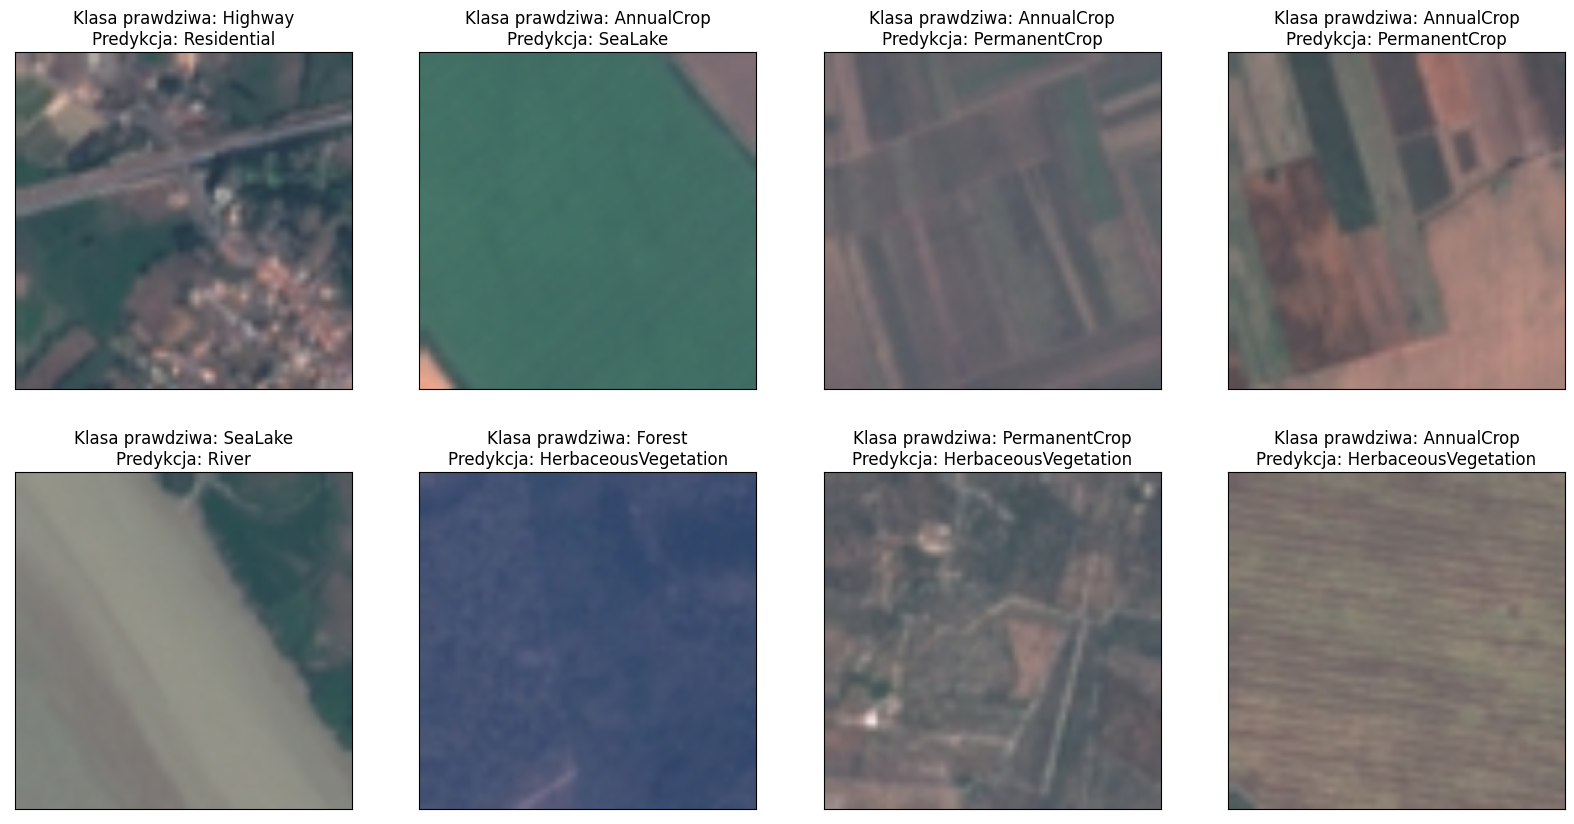

In [38]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(20,10)

for i,j,temp in zip([0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3],lst_false):
    ax[i,j].imshow(torch.transpose((sil_gen.ds[temp[2]][0].T.cpu()+1)/2,1,0).numpy())
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    ax[i,j].set_title(f"Klasa prawdziwa: {DS_LABELS[temp[0]]}\nPredykcja: {DS_LABELS[temp[1]]}")

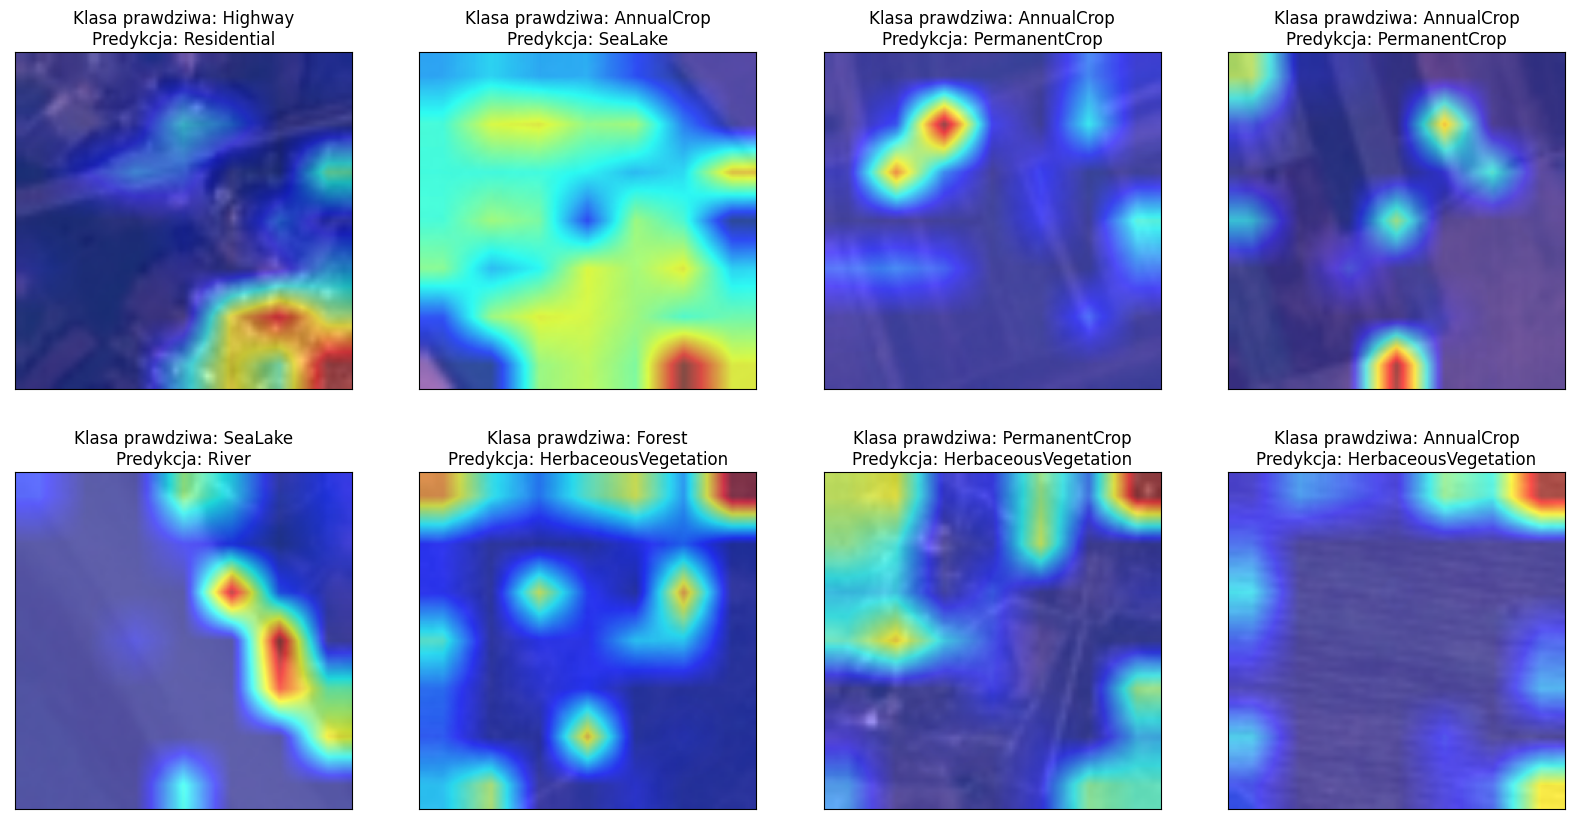

In [34]:
fig, ax = plt.subplots(2,4)
fig.set_size_inches(20,10)

for i,j,temp in zip([0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3],lst_false):
    sl , pert_sl, pred = sil_gen.get_pair_sailency(temp[2],return_pred = True)
    cam_image = show_cam_on_image(torch.transpose((sil_gen.ds[temp[2]][0].T.cpu()+1)/2,1,0).numpy(), sl, use_rgb=True)
    ax[i,j].imshow(cam_image)
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    ax[i,j].set_title(f"Klasa prawdziwa: {DS_LABELS[temp[0]]}\nPredykcja: {DS_LABELS[temp[1]]}")